# Module 1, Week 1

Load .txt data and visualize it!

**Useful chapters from Data 8 textbook to review:** _Chapters 3-5 and 7. https://www.inferentialthinking.com/chapters/intro_

**Before class reading:**
- Week 1 reading assignment "The Dynamic Earth" and "EARTH SCIENCE LITERACY: The Big Ideas and Supporting Concepts of Earth Science"
- _Python for Data Analysis pgs. 167-174, Ch.9_
- _Fundamentals of Geophysics Ch 1.2_

**Last week we:**
- Went over the syllabus (https://bcourses.berkeley.edu/courses/1474063/assignments/syllabus).
- Took a whirlwind tour of Earth Sciences and the types of data used in geophysics.
- Saw how to make basic maps with cartopy library. Discussed advantages and disadvantages of different map projections.

**Our goals for today:**
- Plot histograms, cumulative distributions, and global maps.
- Load and visualize global topography.
- Learn about the topography of Earth (hypsometric curve).
- Load and visualize global seafloor age.



# Exercise 1, Elevation of Earth's Surface

In class exercise, full credit for attempts, answer the questions in break-out sessions with your group

Replace the ...'s and xxx's as we go through this notebook together.

## Setup

Run this cell as it is to setup your environment.

In [2]:
import  numpy  as  np
import  matplotlib.pyplot  as plt
import pandas as pd
from matplotlib import cm
from cartopy import config
import cartopy.crs as ccrs

## Step 1) Open the data file and have a look

Use the text editor of your choice and open the text file. Make sure it's the file you want. 

Take note of: 
-  number of header rows
-  number of columns and rows
-  are they string/integer/float types
-  what is the delimiter

Usually this will be straight foward. For example:

<img src="Figures/csv_example.png" width="600">

Or slightly more complicated, but still do-able:

<img src="Figures/more_complicated_example.png" width="700">

Sometimes you'll mess up and get something crazy.

<img src="Figures/AHHH_example.png" width="700">



It's much better to catch this early than to struggle trying to troubleshoot.

<img src="Figures/meme_AHHH_example.png" width="700">

## Reading data in text format

The functions we will use most for reading data in text format are `np.loadtxt`,`pd.read_csv`, and `pd.read_table`. They are similar except `pd.read_csv` has a default comma delimiter and `pd.read_table` has tab (`'\t'`) as its default delimiter.

The syntax will look something like: `pd.read_csv('filename.csv',header=2, sep=',',names=['Date','Time','Location'])`

<img src="Figures/Table_6_2.png" width="700">

> Source: Python for Data Analysis, McKinney

### Load topography data

First we'll load the files of global topography that we will be analyzing. There are three files: an array of latitudes (size 540 x 1), an array of longitudes (size 1081 x 1), and a gridded array of topography (size 540 x 1081).

In [4]:
# Load the elevation/seafloor depth data
lats=np.loadtxt('etopo20lats.txt') 
lons=np.loadtxt('etopo20lons.txt')
topo_grid=np.loadtxt('etopo20data.txt')


Again, it helps to see the data, so `print` and check it's what you expect.

In [5]:
print(lats)
lats.shape

[-89.8333333 -89.5       -89.1666667 -88.8333334 -88.5000001 -88.1666668
 -87.8333335 -87.5000002 -87.1666669 -86.8333336 -86.5000003 -86.166667
 -85.8333337 -85.5000004 -85.1666671 -84.8333338 -84.5000005 -84.1666672
 -83.8333339 -83.5000006 -83.1666673 -82.833334  -82.5000007 -82.1666674
 -81.8333341 -81.5000008 -81.1666675 -80.8333342 -80.5000009 -80.1666676
 -79.8333343 -79.500001  -79.1666677 -78.8333344 -78.5000011 -78.1666678
 -77.8333345 -77.5000012 -77.1666679 -76.8333346 -76.5000013 -76.166668
 -75.8333347 -75.5000014 -75.1666681 -74.8333348 -74.5000015 -74.1666682
 -73.8333349 -73.5000016 -73.1666683 -72.833335  -72.5000017 -72.1666684
 -71.8333351 -71.5000018 -71.1666685 -70.8333352 -70.5000019 -70.1666686
 -69.8333353 -69.500002  -69.1666687 -68.8333354 -68.5000021 -68.1666688
 -67.8333355 -67.5000022 -67.1666689 -66.8333356 -66.5000023 -66.166669
 -65.8333357 -65.5000024 -65.1666691 -64.8333358 -64.5000025 -64.1666692
 -63.8333359 -63.5000026 -63.1666693 -62.833336  -62.5

(540,)

In [6]:
print(lons)
lons.shape

[ 20.1666667  20.5        20.8333333 ... 379.4999641 379.8332974
 380.1666307]


(1081,)

In [7]:
print(topo_grid)
topo_grid.shape

[[ 2804.      2804.      2804.     ...  2804.      2804.      2804.    ]
 [ 2831.      2831.      2831.     ...  2831.      2831.      2831.    ]
 [ 2808.      2808.      2808.     ...  2808.      2808.      2808.    ]
 ...
 [-4349.375  -4350.     -4350.25   ... -4348.8125 -4349.125  -4349.375 ]
 [-4311.5625 -4311.875  -4312.5    ... -4310.875  -4311.375  -4311.5625]
 [-4291.5    -4291.5    -4291.5    ... -4291.5    -4291.5    -4291.5   ]]


(540, 1081)

Next we'll need to manipulate the data a bit. We want a (540 x 1081 = 583740) (583740) element array to plot the distribution of elevations. We can up the numpy function `reshape` to do this.

In [17]:
topo_array = topo_grid.reshape(...)

TypeError: expected sequence object with len >= 0 or a single integer

## Visualizing data
### Plot histogram of elevation data

First we plot a simple histogram with the `matplotlib` function `hist`. Setting `density=False` will give the count number in each bin, setting `density=True` will give a normalized histogram where the area under the histogram will sum to 1 (i.e. 100%).

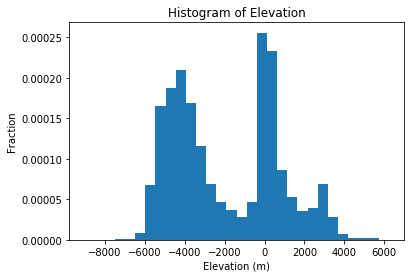

In [12]:
plt.hist(topo_array,bins=30,density=...)
plt.xlabel('Elevation (m)')
plt.ylabel('Fraction')
plt.title('Histogram of Elevation');

There are two peaks, one near sea-level and one below sea-level (the ocean basins). Earth's crust comes in two flavors: continental and oceanic. And there is something that gives them districtly different elevations.

In [13]:
from IPython.display import YouTubeVideo
# Why Earth Has Two Levels | Hyprometric Curve
# Video credit: MinuteEarth
# Start at 3s, End at 2:25
YouTubeVideo('KOv3FGVmRcA?t=3s', width="1000", height="500")

Why do continental crust and oceanic crust have different elevations?

_Write your answer here_

### Plot Hypsometric Curve

Another useful method of visualizing the distribution of our data is a cumulative distribution function (CDF), which for topography has the name "Hypsometric Curve." 

The value on the hypsometric curve represents the percentage of Earth's surface with an elevation higher than the elevation at the corresponding value.

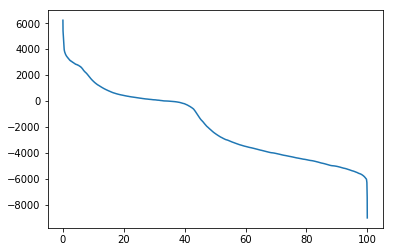

In [15]:
sorted_topo = sorted(...,reverse=True) # sort the data by decreasing numbers
sorted_topo = np.asarray(sorted_topo)
percent_topo = np.linspace(0,100,len(sorted_topo)) # percentage of Earth's surface that lies above a given elevation.


plt.plot(percent_topo,sorted_topo); #plot


This looks right, but it isn't very informative. 

We need to add labels, and let's color continental and oceanic crust different colors.

In [16]:
sorted_topo = sorted(topo_array,reverse=True) # sort the data by decreasing numbers
sorted_topo = np.asarray(sorted_topo)
percent_topo = np.linspace(0,100,len(sorted_topo)) # percentage of Earth's surface that lies above a given elevation.

# split sorted_topo and percent_topo into continental and oceanic parts using boolean indexing
continental = sorted_topo[sorted_topo ... 0]
percent_cont = percent_topo[sorted_topo > 0]
oceanic = sorted_topo[sorted_topo <= 0]
percent_ocean = percent_topo[sorted_topo ... 0]


plt.plot(percent_cont,continental,'g-',label='Continental',linewidth=2) #plot
plt.plot(percent_ocean,oceanic,'b-',label= 'Oceanic',linewidth=2)
plt.xlabel('Percent')  # labels
plt.ylabel('Elevation (m)')
plt.legend(loc='best')
plt.title('Hypsometric Curve');

SyntaxError: invalid syntax (<ipython-input-16-f31010e21de1>, line 6)

For reference the CDF or Hypsometric Curve of a planet (Planet X) that has a normally distribution crust with the same mean and standard deviations as Earth's crust would look like this:

In [ ]:
mu = np.mean(topo_array); # compute the mean elevation of Earth's surface
sigma = np.std(topo_array); # compute the standard deviation about the mean elevation of Earth's surface
s = sigma*np.random.randn(10000)+mu; # generate normally distributed random Planet X elevation

sorted_s = sorted(s,reverse=True) # sort the data by decreasing numbers
percent_s = np.linspace(0,100,10000) # percentage of surface that lies above a given elevation


plt.plot(percent_s,sorted_s,linewidth=2,label='Elevation'); # plot
plt.plot([0, 100],[0,0],linewidth=2,label='Sealevel'); # plot
plt.xlabel('Percent')  # add labels
plt.ylabel('Elevation (m)')
plt.legend(loc='best')
plt.title('Planet X Hypsometric Curve');

What percentage of the surface of Planet X is above sealevel?

_Write your answer here._

### Topograpic Map

Histograms and CDFs are two useful 1D visualizations of our data, but what about the distribution of topography across the globe? 

Again, we'll need to manipulate the data a bit. We need grids of latitude and longitude in order to map the topography. Like `topo_grid` they will be (size 540 x 1081). `lat_grid` will have rows of constant latitude, and `lon_grid` will have columns of constant longtiude. To do this we'll call the numpy functions `repeat`, `reshape`, and `tile`.

<img src="Figures/lon_lat_grids.png">

**Reshape data into grids for mapping**

In [ ]:
latitude =  np.repeat(lats,1081) # repeat the array of latitudes 1081 times
lat_grid = latitude.reshape(540,1081) # reshape that (583740,1) element array to (540,1081)

lon_grid = np.tile(lons,(540,1)) # repeat the array of longtitudes 540 times as rows

print(lat_grid)

In [ ]:
print(lon_grid)

Use the grids of latitude and longtitude to plot a Robinson projection map of topography using the `cartopy` function `contourf`.

In [ ]:
plt.figure(1,(20,20)) # make a figure object to put things on
ax = plt.axes(projection=ccrs.Robinson()) # set the map projection to Robinson
ax.set_global() # set the axes of the map
map1=plt.contourf(..., ..., ...,40,cmap=cm.jet,transform=ccrs.PlateCarree()) # plot topography

ax.coastlines()
ax.gridlines()

plt.show()

That looks great! But what do the colors mean? We need to add a colobar for context.

In [ ]:
plt.figure(1,(20,20))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
map1=plt.contourf(lon_grid, lat_grid, topo_grid,40,cmap=cm.jet,transform=ccrs.PlateCarree())

color_ax = plt.axes(...)  # set where the colorbar goes with [left, bottom, width, height] in figure coordinates
plt.colorbar(cax=color_ax) # add a colorbar of topography values

plt.title('Topography, meters'); # add a title

ax.coastlines()
ax.gridlines()

plt.show()

Let's choose a `colormap` that better shows +/- elevation.

https://matplotlib.org/users/colormaps.html

In [ ]:
plt.figure(1,(20,20))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()

# change the colormap to something better
map1=plt.contourf(lon_grid, lat_grid, topo_grid,40,cmap=cm.xxx,transform=ccrs.PlateCarree()) 

color_ax = plt.axes([0.95, 0.3, 0.05, 0.35])
plt.colorbar(cax=color_ax) 

plt.title('Topography, meters'); 

ax.coastlines()
ax.gridlines()

plt.show()

That's better, but elevation of 0.0 meters (sealevel) still isn't the midpoint of the colormap.

To do that things get a little tricky. We can look it up in the matplotlib documentation. https://matplotlib.org/users/colormapnorms.html#custom-normalization-two-linear-ranges We'll define a new normalization class `MidpointNormalize`. Normalizations are classes defined in the `matplotlib.colors()` module. The default linear normalization is `colors.Normalize()`, another example is `colors.LogNorm()`.

In [ ]:
import matplotlib.colors as colors

plt.figure(1,(20,20))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()

# Example of making your own norm.  Also see matplotlib.colors.
# Source: https://matplotlib.org/users/colormapnorms.html#custom-normalization-two-linear-ranges
# From Joe Kington: This one gives two different linear ramps:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
#####



# change the midpoint of the colormap to 0.0
map1=plt.contourf(lon_grid, lat_grid, topo_grid,40,norm=MidpointNormalize(midpoint=...),cmap=cm.BrBG_r,transform=ccrs.PlateCarree()) 

color_ax = plt.axes([0.95, 0.3, 0.05, 0.35])
plt.colorbar(cax=color_ax) 

plt.title('Topography, meters'); 

ax.coastlines()
ax.gridlines()

plt.show()

Ta Da!

What features can you identify, where? (Mountain belts, continental shelf, abyssal plain, ocean trenches, mid-ocean ridges, volcanic islands)

_Write your answer here._